# <center>Convolutional Neural Networks</center>
## <center>Inclass Project 4 - MA4144</center>

This project contains 5 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload both the PDF and the ipynb file on moodle**.

***

## Outline of the project

The aim of the project is to practically learn and implement about CNN. This project will have two main sections.

Section 1: Build a convolutional layer and pooling layer from scratch. Then test them on a sample image.

Section 2: Use the Keras library to implement a CNN to classify images on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

***


Use the below cell to use any include any imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.preprocessing.image import load_img
from numpy.lib.stride_tricks import sliding_window_view
from keras.preprocessing.image import load_img, img_to_array
import keras
from scipy import signal

## Section 1: Convolution and Pooling

**Q1** In the following cell, implement a method called create_padding. The method will take in input_image ($n \times m$) and will return a zero-padded image called output_image of dimension $(n + 2d) \times (m + 2d)$ where $d$ is the padding thickness on either side.

In [4]:
def create_padding(input_image, d):

    output_image = np.pad(input_image, pad_width=((d, d), (d, d)), mode='constant', constant_values=0)

    return output_image
    

**Q2** In the following cell, implement a method called convolution. The method will take in input_image ($n \times m$), kernel ($k \times k$) and will return output_image of dimension $(n - k + 1) \times (m - k + 1)$. The output_image is the result of the convolution between input_image and kernel. You may assume that the stride is $1$.

In [13]:
def convolution(input_image, kernel):

    # Flip kernel for convolution (remove flip if cross-correlation is intended)
    kernel = np.flipud(np.fliplr(kernel))
    
    # Extract sliding windows
    windowed = sliding_window_view(input_image, kernel.shape)
    
    # Perform element-wise multiplication and sum across the last two axes
    output_image = np.einsum('ijkl,kl->ij', windowed, kernel)

    return output_image

**Q3** In the following cell, implement a method called pooling. The method will take in input_image ($n \times m$), $p$ the pooling dimension, pooling_type (either max_pooling or avg_pooling) and will return output_image of dimension $(n - p + 1) \times (m - p + 1)$. The output_image is the result of performing pooling on input_image by a window of dimension $p \times p$. You may assume that the stride is $1$.

In [14]:
def pooling(input_image, p, pooling_type = "max_pooling"):

    # Extract sliding windows of shape (p, p)
    windows = sliding_window_view(input_image, (p, p))  # shape: (n-p+1, m-p+1, p, p)

    if pooling_type == "max_pooling":
        output_image = np.max(windows, axis=(2, 3))

    elif pooling_type == "avg_pooling":
        output_image = np.mean(windows, axis=(2, 3))

    else:
        print("Error: Invalid pooling type")
        return

    return(output_image)
    

The 'lena' image is widely used for image processing experiments and has been a benchmark image until recently.
We will use a $512 \times 512$ grayscale lena sample to test our convolution and pooling implementations.

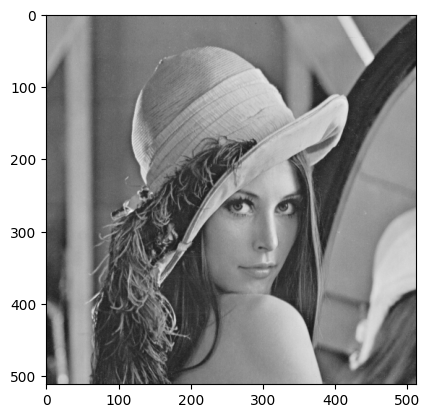

In [19]:
lena = load_img('lena.gif')
plt.imshow(lena)
plt.show()

lena = img_to_array(lena)  # shape will be (H, W, 1)
lena = lena[:, :, 0]  

**Q4** In the following perform convolution on lena. Make sure you use padding appropriately to maintain the image size after convolution. However, pooling should be done on an unpadded image and image size may not be preseved after pooling. Use the following kernels to perform convolution and pooling separately.

1. $\begin{bmatrix} +1 & 0 & -1 \\ +1 & 0 & -1 \\ +1 & 0 & -1 \end{bmatrix}$
   
2. $\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$
 
3. $\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$

4. $\begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}$

5. Any other kernel that you may find interesting.

The following outputs are expected:
1. lena kernel 1 convolution and then max pooled, set your output to the variable lena_kernel_1_maxpool.
2. lena kernel 2 convolution and then average pooled, set your output to the variable lena_kernel_2_avgpool.
3. lena kernel 3 convolution and then max pooled, set your output to the variable lena_kernel_3_maxpool.
4. lena kernel 4 convolution and then average pooled, set your output to the variable lena_kernel_4_avgpool.

In [25]:
kernel_1 = np.array([[+1, 0, -1],
                     [+1, 0, -1],
                     [+1, 0, -1]])

kernel_2 = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [+1, +1, +1]])

kernel_3 = np.array([[-1, 0, +1],
                     [-2, 0, +2],
                     [-1, 0, +1]])

kernel_4 = np.array([[+1, +2, +1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

kernel_5 = np.array([[ 0,  1,  0],
                     [ 1, -4,  1],
                     [ 0,  1,  0]])
d = 1
p = 2  # Pooling window size

# Convolution and pooling steps
conv_1 = convolution(create_padding(lena, d), kernel_1)
lena_kernel_1_maxpool = pooling(conv_1, p, "max_pooling")

conv_2 = convolution(create_padding(lena, d), kernel_2)
lena_kernel_2_avgpool = pooling(conv_2, p, "avg_pooling")

conv_3 = convolution(create_padding(lena, d), kernel_3)
lena_kernel_3_maxpool = pooling(conv_3, p, "max_pooling")

conv_4 = convolution(create_padding(lena, d), kernel_4)
lena_kernel_4_avgpool = pooling(conv_4, p, "avg_pooling")

conv_5 = convolution(create_padding(lena, d), kernel_5)
lena_kernel_5_avgpool = pooling(conv_5, p, "avg_pooling")


<font color='blue'>Explain what each of the above kernels (including your choice) will do to the image.</font>

In [26]:
Ans_Kernel_1 = "Kernel 1 detects vertical edges by highlighting intensity changes in the horizontal direction. It emphasizes vertical structures like facial contours or object boundaries."

Ans_Kernel_2 = "Kernel 2 detects horizontal edges by responding to vertical intensity changes. It brings out horizontal features such as eyebrows and lips."

Ans_Kernel_3 = "Kernel 3 is a Sobel filter in the X direction, emphasizing vertical edges with weighted gradients. It provides smoother and stronger vertical edge detection than Kernel 1."

Ans_Kernel_4 = "Kernel 4 is a Sobel filter in the Y direction, enhancing horizontal edges with greater sensitivity. It highlights smooth horizontal gradients like those on the forehead or shoulders."

Ans_Kernel_5 = "Kernel 5 is a Laplacian filter that detects edges in all directions by measuring second-order intensity changes. It creates a sketch-like output by emphasizing sharp transitions."


Show the resulting image after convolution and pooling separately on two subplots (of the same plot) for each kernel. There should be 5 plots with two sub plots in each.

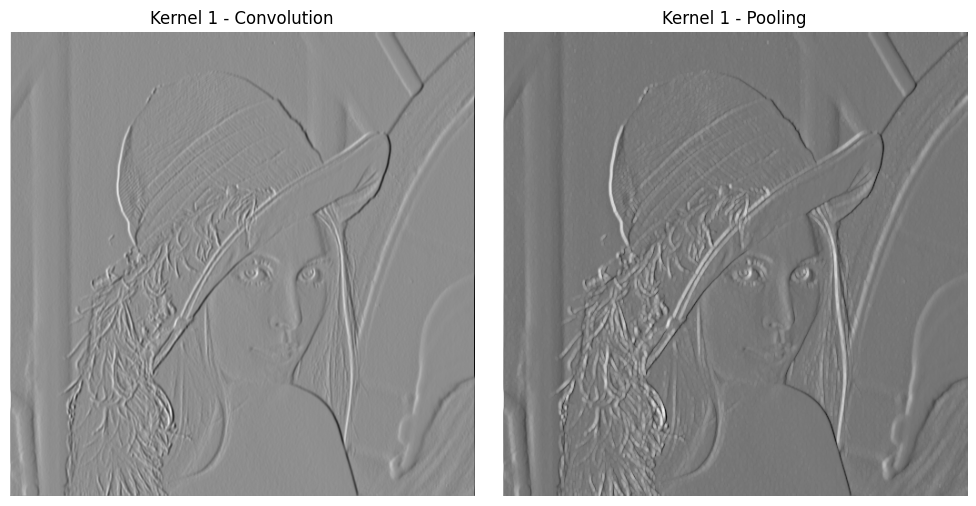

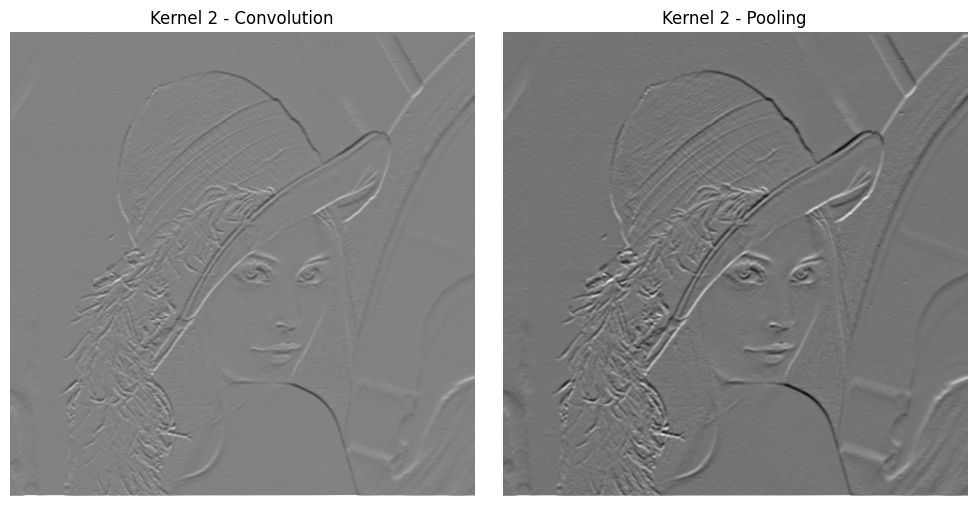

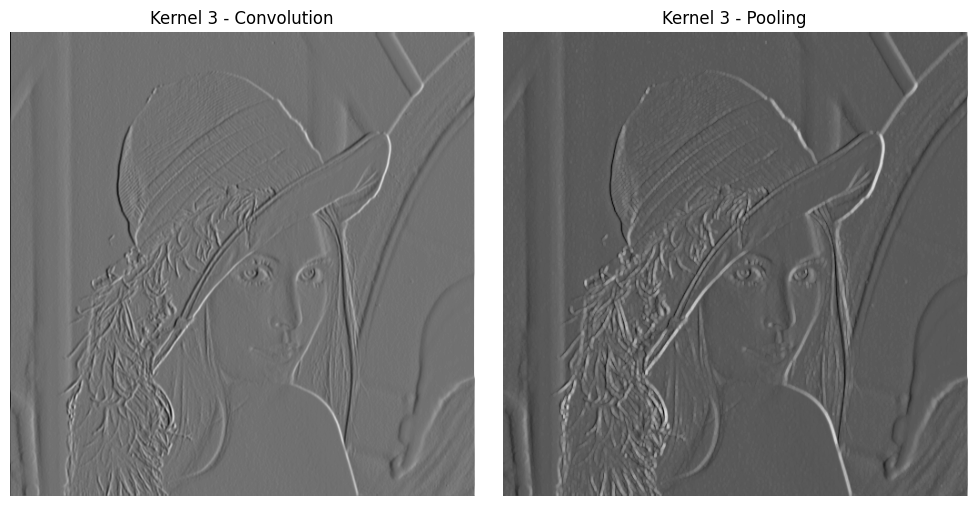

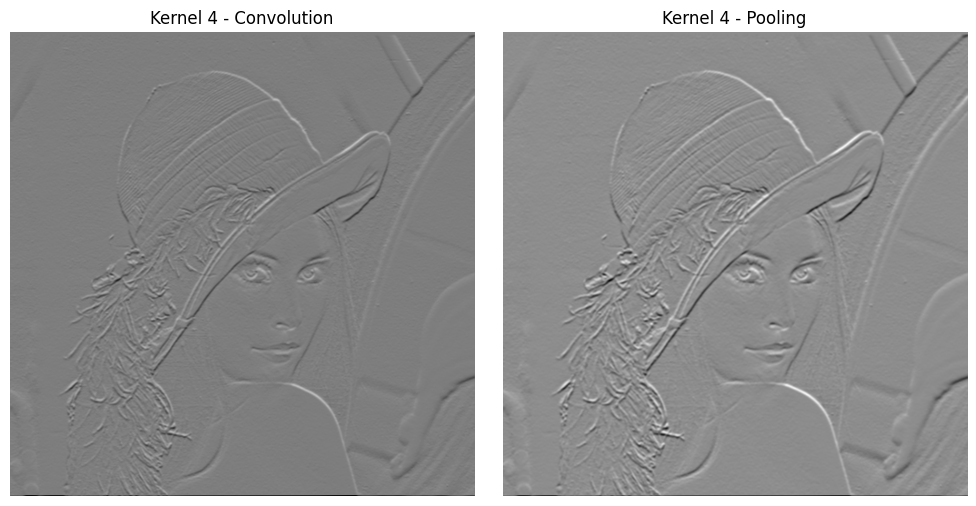

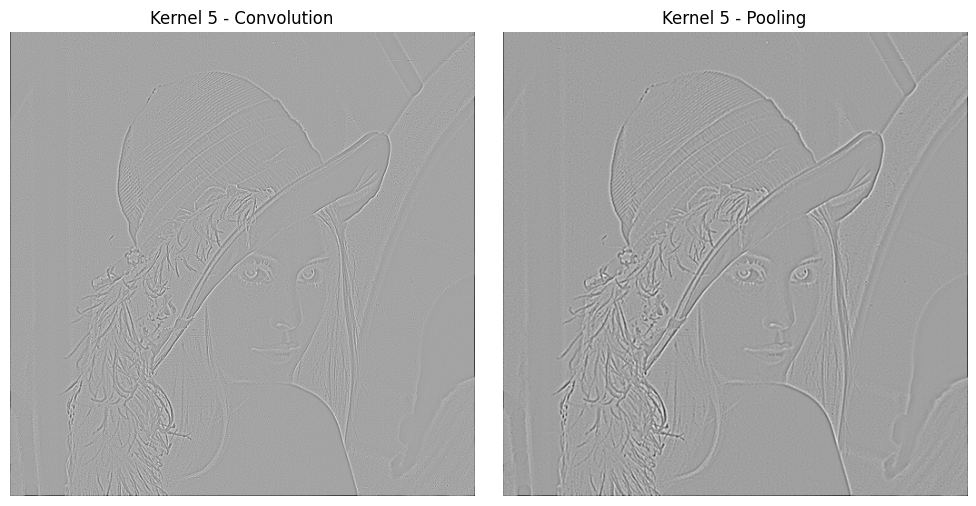

In [28]:
def plot_conv_and_pool(conv_img, pool_img, title, cmap='gray'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(conv_img, cmap=cmap)
    ax[0].set_title(f'{title} - Convolution')
    ax[0].axis('off')
    
    ax[1].imshow(pool_img, cmap=cmap)
    ax[1].set_title(f'{title} - Pooling')
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot for Kernel 1
plot_conv_and_pool(conv_1, lena_kernel_1_maxpool, "Kernel 1")

# Plot for Kernel 2
plot_conv_and_pool(conv_2, lena_kernel_2_avgpool, "Kernel 2")

# Plot for Kernel 3
plot_conv_and_pool(conv_3, lena_kernel_3_maxpool, "Kernel 3")

# Plot for Kernel 4
plot_conv_and_pool(conv_4, lena_kernel_4_avgpool, "Kernel 4")

# Plot for Kernel 5 (laplacian)
plot_conv_and_pool(conv_5, lena_kernel_5_avgpool, "Kernel 5")

## Section 2: Using Keras to implement CNN for image classification

This section, unlike the previous projects you are granted full liberty to **build the structure of your model appropriately using keras**. I have provided only the code to download the cifar10 dataset. (Note that cifar10 contains rgb images with 3 channels unlike the grayscake image lena we used earlier.)

**Final expected outcome:** For the best CNN model architecture and parameters you find, **your model is required to be able to provide accurate predictions**. The **accuracy rate will determine your score**. For this **implement a predict function** - instructions given below.

Hint: To improve your model you may use the following techniques. 
1. 5-fold cross validation accuracy.
2. Testing accuracy.
3. Confusion matrix of the result.
4. Precision recall for each class.

Test on different hyperparameters and network architectures and select decide the best performer based on the cross-validation accuracy.

In [29]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 732s 4us/step



--- Fold 1 ---
Epoch 1/10
625/625 - 96s - loss: 1.6418 - accuracy: 0.3981 - val_loss: 1.3692 - val_accuracy: 0.5102 - 96s/epoch - 154ms/step
Epoch 2/10
625/625 - 86s - loss: 1.2513 - accuracy: 0.5533 - val_loss: 1.0842 - val_accuracy: 0.6107 - 86s/epoch - 137ms/step
Epoch 3/10
625/625 - 81s - loss: 1.0838 - accuracy: 0.6161 - val_loss: 0.9169 - val_accuracy: 0.6758 - 81s/epoch - 129ms/step
Epoch 4/10
625/625 - 80s - loss: 0.9744 - accuracy: 0.6571 - val_loss: 0.8601 - val_accuracy: 0.7004 - 80s/epoch - 128ms/step
Epoch 5/10
625/625 - 82s - loss: 0.9000 - accuracy: 0.6841 - val_loss: 0.8060 - val_accuracy: 0.7188 - 82s/epoch - 131ms/step
Epoch 6/10
625/625 - 80s - loss: 0.8354 - accuracy: 0.7076 - val_loss: 0.8186 - val_accuracy: 0.7129 - 80s/epoch - 127ms/step
Epoch 7/10
625/625 - 80s - loss: 0.7856 - accuracy: 0.7239 - val_loss: 0.7674 - val_accuracy: 0.7348 - 80s/epoch - 128ms/step
Epoch 8/10
625/625 - 80s - loss: 0.7467 - accuracy: 0.7361 - val_loss: 0.7202 - val_accuracy: 0.7531 -

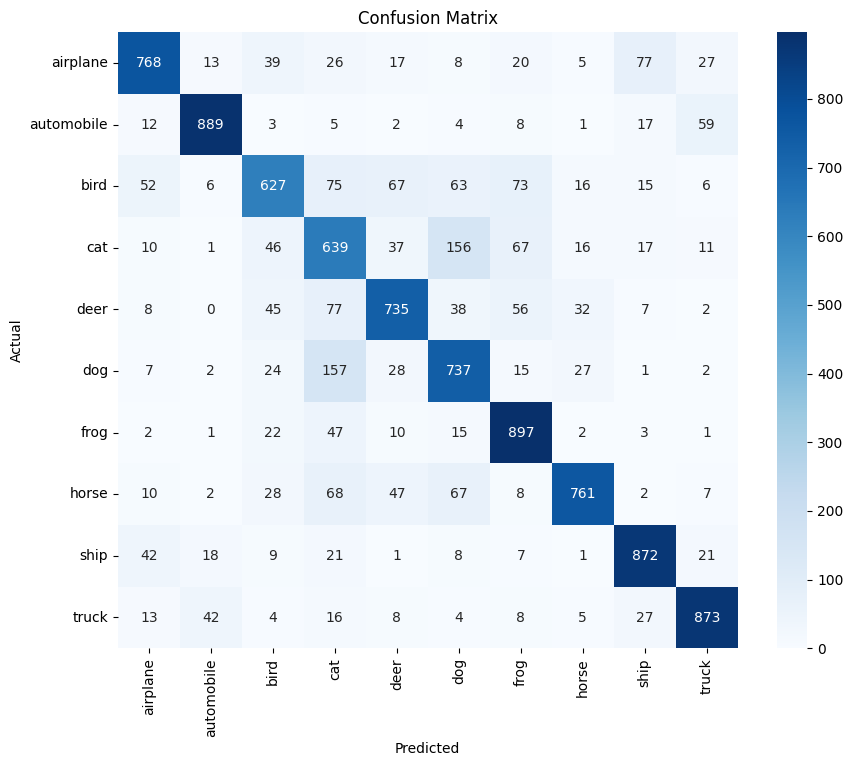

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Define CNN architecture function
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 5-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(x_train)):
    print(f"\n--- Fold {fold + 1} ---")
    model = create_model()
    model.fit(x_train[train_idx], y_train[train_idx], 
              epochs=10, batch_size=64, 
              validation_data=(x_train[val_idx], y_train[val_idx]), verbose=2)
    val_loss, val_acc = model.evaluate(x_train[val_idx], y_train[val_idx], verbose=0)
    cv_scores.append(val_acc)

print(f"\nAverage Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")

# Train final model on full training data
final_model = create_model()
final_model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=2,
                validation_split=0.1)

# Evaluate on test set
test_loss, test_acc = final_model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Confusion matrix and classification report
y_pred = final_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


In [33]:
import torch
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 data
(_, _), (x_test, _) = cifar10.load_data()

# Pick 64 test images
x_test_sample = x_test[:64]  # Shape: [64, 32, 32, 3]

# Normalize and convert to PyTorch format: [64, 3, 32, 32]
x_test_sample = x_test_sample.astype('float32') / 255.0
x_test_sample = np.transpose(x_test_sample, (0, 3, 1, 2))  # [64, 3, 32, 32]
torch_test_batch = torch.tensor(x_test_sample)


In [34]:
#In this cell define the function predict, which will predict the class of test_images using your best CNN-model.
#The output should be a python list of strings of classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
#Your work will be mainly evaluated based on this.
#The grader will test it against input images and your score will be determined based on the number of correct predictions. 
#Expect the input to be a torch tensor of shape [64, 3, 32, 32]

import numpy as np
import torch

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def predict(test_images):

    # Convert from PyTorch tensor to NumPy array
    if isinstance(test_images, torch.Tensor):
        test_images = test_images.detach().cpu().numpy()
    
    # Transpose from [N, 3, 32, 32] to [N, 32, 32, 3] for Keras model
    test_images = np.transpose(test_images, (0, 2, 3, 1))
    
    # Normalize pixel values to [0, 1]
    test_images = test_images.astype('float32') / 255.0

    # Predict using the trained Keras model (assumed to be named `final_model`)
    preds = final_model.predict(test_images, verbose=0)
    
    # Get class indices and convert to class names
    class_indices = np.argmax(preds, axis=1)
    predictions = [class_names[i] for i in class_indices]
    
    return predictions

predicted_classes = predict(torch_test_batch)
print(predicted_classes)  # → ['cat', 'dog', 'frog', ..., 'airplane']


['deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer', 'deer']
